# Question 3 (Applied): Exercise 9
This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

First we imported the data set by reading `Auto.csv` using pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots

Auto = pd.read_csv('Auto.data', na_values=['?'], delim_whitespace=True)
Auto.shape

(397, 9)

The missing values are then removed using the following code. The data set after filtering missing value rows indicates that there are **5** rows with missing values.

In [2]:
Auto = Auto.dropna()
Auto.shape

(392, 9)

#### (a) Which of the predictors are quantitative, and which are qualitative?

In [3]:
print(Auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


<Axes: xlabel='origin', ylabel='mpg'>

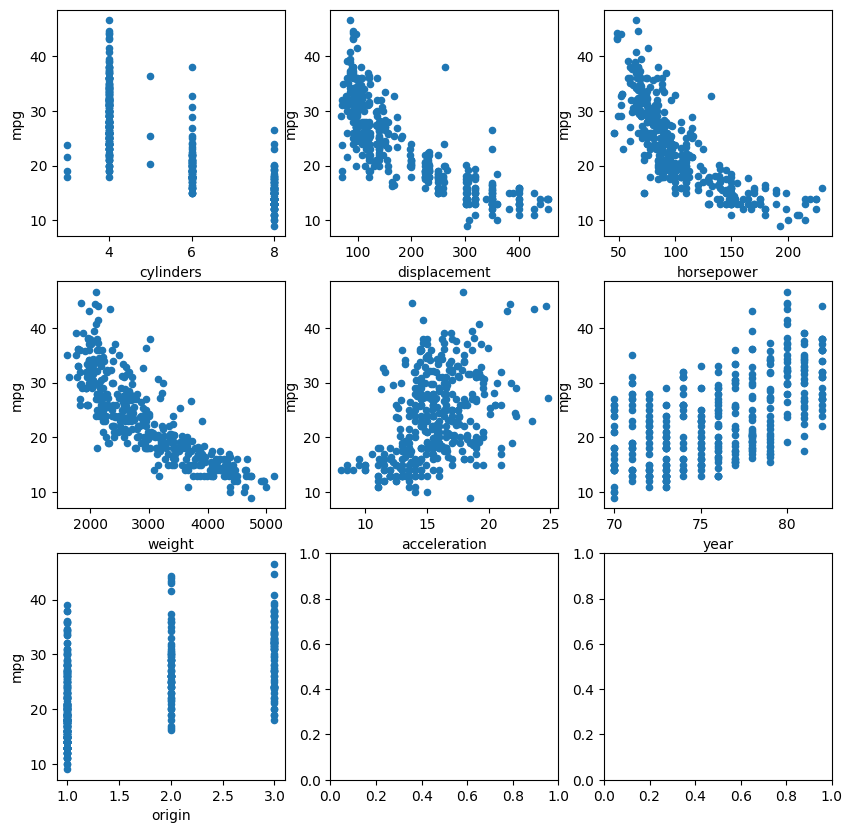

In [4]:
fig, axes = subplots(ncols=3, nrows=3, figsize=(10, 10))

Auto.plot.scatter('cylinders', 'mpg', ax=axes[0, 0])
Auto.plot.scatter('displacement', 'mpg', ax=axes[0, 1])
Auto.plot.scatter('horsepower', 'mpg', ax=axes[0, 2])

Auto.plot.scatter('weight', 'mpg', ax=axes[1, 0])
Auto.plot.scatter('acceleration', 'mpg', ax=axes[1, 1])
Auto.plot.scatter('year', 'mpg', ax=axes[1, 2])

Auto.plot.scatter('origin', 'mpg', ax=axes[2, 0])

Upon observing the datatypes of each predictor (excluding the name as it is not suitable for a predictor), it can be argued that all of the predictors are quantitative due to their numeric nature. 

However, from the scatter plots between the predictors and `mpg`, we can see that `cylinders`, `year`, and `origin` have a limited number of discrete values for each entry, suggesting that these are categorical rather than continuous and are thus qualitative predictors.
Therefore, in this dataset, **the quantitative predictors are `displacement`, `weight`, `horsepower`, and `acceleration`**, while **the qualitative predictors are `cylinders`, `year`, and `origin`**.

#### (b) What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in numpy.

In [5]:
# Using the inbuilt min() and max() methods from the Pandas library
quantitative_predictors = ['displacement', 'horsepower', 'weight', 'acceleration']

for predictor in quantitative_predictors:
    predictor_range = Auto[predictor].max() - Auto[predictor].min()
    print ("The range for ", predictor, " is ", predictor_range)

The range for  displacement  is  387.0
The range for  horsepower  is  184.0
The range for  weight  is  3527.0
The range for  acceleration  is  16.8


In [6]:
# Using the min() and max() methods from the NumPy library
for predictor in quantitative_predictors:
    predictor_range = np.max(Auto[predictor]) - np.min(Auto[predictor]) 
    print ("The range for ", predictor, " is ", predictor_range)

The range for  displacement  is  387.0
The range for  horsepower  is  184.0
The range for  weight  is  3527.0
The range for  acceleration  is  16.8


As we can see, the quantitative predictor with the smallest range is `acceleration` with a range of 16.8, followed by `horsepower` with a range of 184.0 and `displacement` with a range of 387.0, while the largest range is that of `weight` with a range of 3527.0

#### (c) What is the mean and standard deviation of each quantitative predictor?

The mean and standard deviation for the quantitative predictors can be found using the mean() and std() methods respectively from the Pandas library.

In [7]:
for predictor in quantitative_predictors:
    print (predictor.capitalize(), "-")
    print ("Mean:", Auto[predictor].mean())
    print ("Standard Deviation:", Auto[predictor].std())
    print ("----------------------------")

Displacement -
Mean: 194.41198979591837
Standard Deviation: 104.64400390890465
----------------------------
Horsepower -
Mean: 104.46938775510205
Standard Deviation: 38.49115993282855
----------------------------
Weight -
Mean: 2977.5841836734694
Standard Deviation: 849.4025600429494
----------------------------
Acceleration -
Mean: 15.541326530612244
Standard Deviation: 2.7588641191880816
----------------------------


#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

We used the Boolean Indexing method discussed in the Lab to filter 10th - 85th observations.

In [8]:
keep_rows = np.ones(Auto.shape[0], bool)

We set the elements of `keep_rows` from 10th to 85th  to `False`. `Python` uses 0-based indexing, the 10th element corresponds to the index = 9, and the 85th element corresponds to the index = 84. The indexing notation `[9:85]` will select the element from index = 9 to index = 84, because the ending index `85` is excluded.

In [9]:
keep_rows[9:85] = False
Auto_filtered = Auto[keep_rows]
Auto_filtered.shape

(316, 9)

After the removal of 10th to 85th observations (76 rows), the data set now has 392 - 76 = **316** rows

To calculate the range, mean, and standard variations, we used the `describe` function from `pandas` dataframe and print out the 4 information that we are interested. The results can be found in the following table

In [10]:
descriptions = ['min', 'max', 'mean', 'std']
report = Auto_filtered.describe().loc[descriptions, :]
report.loc['range'] = report.loc['max'] - report.loc['min']
report

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910
range,35.600000,5.000000,387.000000,184.000000,3348.000000,16.300000,12.000000,2.000000


#### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

To visualize the relation between predictors, we created scatterplots. From the plot in question **a**, we identified some columns that seem to relate with each others and plot them here.

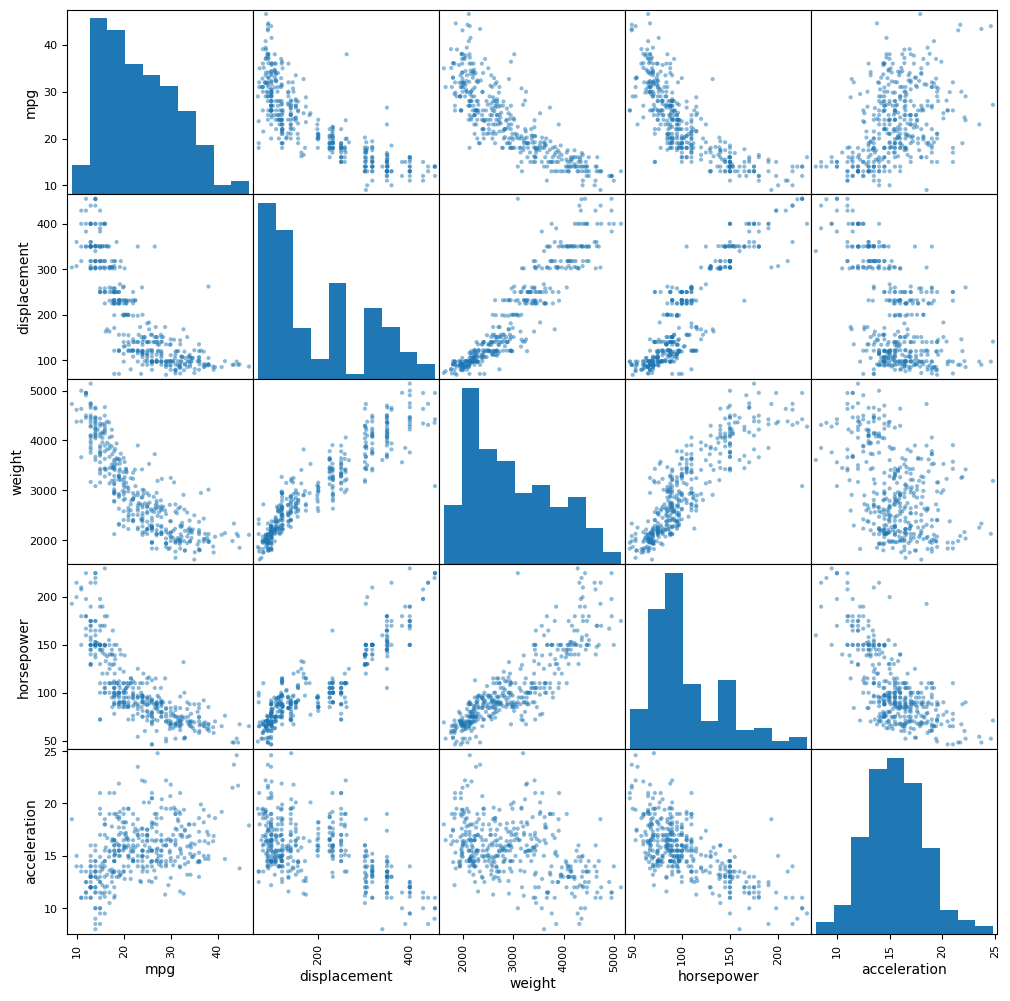

In [11]:
# Columns that seem to be related with each other: 
selected_columns = ["mpg", "displacement", "weight", "horsepower", "acceleration"]
pd.plotting.scatter_matrix(Auto[selected_columns], figsize=(12,12));

From the pair-wise scatter plot, we can observe that:
- The scatter plot suggests negative correlations between the pairs: `mpg` - `displacement`, `mpg` - `weight` and `mpg` - `horsepower`. This is because as the value of  `displacement`, `weight` or `horserpower` increases, the value of `mpg` decreases. The scatter plots also indicate that the relationships with `mpg` are non-linear. The curves can represent the relationships better than straight lines
- In addition, there seems to be a positive correlation between `displacement` and `weight`, between `displacement` and `horsepower`. These two relationships are linear because we can draw a line to represent the data points.

Moreover, taking a closer look at the histogram of `acceleration`, we can see that `acceleration` follows a normal distribution.

#### (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In case we want to predict gas mileage based on other variables, the variables `displacement`, `weight` and `horsepower` can be used. The previous scatter plot shows nonlinear relationships between `mpg` and `displacement`, `weight` or`horsepower`

We also calculate the Pearson correlation coefficient  between `mpg` and all other varibles. As can be seen in the below output, `weight`, `displacement` and `horsepower` have the Pearson correlation coefficient values approaching -1. This point consolidates our assumption that these 3 variables could be used to predict `mpg`

In [12]:
Auto.corr(method="pearson", numeric_only=True).loc[:, 'mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
year            0.580541
mpg             1.000000
Name: mpg, dtype: float64